<a href="https://colab.research.google.com/github/rismdgn/Insomers/blob/patch-1/INSOMERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
print(tf.__version__)

2.17.1


#**Data Collection**

In [ ]:
# Membaca dataset
file_path = '/content/Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Menampilkan nama kolom dan beberapa baris pertama
print("Nama Kolom:")
print(data.columns)

Nama Kolom:
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [ ]:
# Menampilkan beberapa baris pertama
print("Preview Dataset:")
print(data.head())

Preview Dataset:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80 

In [ ]:
# Menampilkan informasi tentang kolom dataset
print("\nInformasi Dataset:")
print(data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
No

In [ ]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%     

In [ ]:
# Memeriksa ukuran dataset
print(f"\nUkuran Dataset: {data.shape[0]} baris, {data.shape[1]} kolom")


Ukuran Dataset: 374 baris, 13 kolom


In [ ]:
# Mengecek nilai unik untuk kolom kategori
for col in ['Gender']:
    if col in data.columns:
        print(f"\nNilai Unik di Kolom '{col}':")
        print(data[col].unique())


Nilai Unik di Kolom 'Gender':
['Male' 'Female']


#**Data Pre-Processing**

***Cek Nilai Kosong***

In [ ]:
missing_values = data.isnull().sum()
print("\nJumlah Nilai Kosong per Kolom Sebelum Preprocessing:")
print(missing_values)


Jumlah Nilai Kosong per Kolom Sebelum Preprocessing:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


***Cek dan Tangani Duplikat (Duplicate Rows).***

In [ ]:
# semua kolom
duplicate_rows_all = data.duplicated().sum()
print(f"Jumlah Baris Duplikat (Semua Kolom): {duplicate_rows_all}")

Jumlah Baris Duplikat (Semua Kolom): 0


In [ ]:
# kolom tertentu
duplicate_rows_subset = data[['Age', 'Gender', 'Stress Level', 'Sleep Duration', 'Quality of Sleep']].duplicated().sum()
print(f"Jumlah Baris Duplikat (Berdasarkan Kolom Tertentu): {duplicate_rows_subset}")

Jumlah Baris Duplikat (Berdasarkan Kolom Tertentu): 268


In [ ]:
# Analisis baris duplikat
duplicates = data[data.duplicated(subset=['Age', 'Gender', 'Stress Level', 'Sleep Duration', 'Quality of Sleep'], keep=False)]
print(f"\nContoh Baris Duplikat:\n{duplicates.head()}")


Contoh Baris Duplikat:
   Person ID Gender  Age            Occupation  Sleep Duration  \
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
1         125/80          75        10000            NaN  
2         

In [ ]:
print(f"Jumlah baris setelah memeriksa duplikat: {len(data)}\n")

Jumlah baris setelah memeriksa duplikat: 374



***Penanganan Kelas Target (Insomnia).***

In [ ]:
# Memeriksa nama kolom dalam dataset
print("Kolom dalam dataset:")
print(data.columns)

Kolom dalam dataset:
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [ ]:
# Menangani jika kolom Insomnia tidak ditemukan
if 'Insomnia' not in data.columns:
    print("\nKolom 'Insomnia' tidak ditemukan. Harap periksa nama kolom atau gunakan nama yang benar.")
else:
    print("\nDistribusi Kelas Target Sebelum Preprocessing:")
    print(data['Insomnia'].value_counts())


Kolom 'Insomnia' tidak ditemukan. Harap periksa nama kolom atau gunakan nama yang benar.


In [ ]:
# Menambahkan Kolom Insomnia
# Misalnya: Sleep Quality < 3 atau Sleep Duration < 5 dianggap insomnia
data['Insomnia'] = ((data['Quality of Sleep'] <= 5) | (data['Sleep Duration'] <= 5) |
                     (data['Stress Level'] >= 4)).astype(int)

In [ ]:
# Preview dataset dengan kolom Insomnia
print("\nPreview Dataset dengan Kolom Insomnia:")
print(data[['Gender', 'Quality of Sleep', 'Sleep Duration', 'Stress Level', 'Insomnia']].head())


Preview Dataset dengan Kolom Insomnia:
  Gender  Quality of Sleep  Sleep Duration  Stress Level  Insomnia
0   Male                 6             6.1             6         1
1   Male                 6             6.2             8         1
2   Male                 6             6.2             8         1
3   Male                 4             5.9             8         1
4   Male                 4             5.9             8         1


***Pilih Fitur dan Target.***

In [ ]:
# Menentukan kolom yang relevan setelah preprocessing
selected_features = ['Gender', 'Stress Level', 'Sleep Duration', 'Quality of Sleep']
target_column = ['Insomnia']

In [ ]:
X = data[selected_features]
y = data[target_column]

***Encoding Kolom Kategori (Label Encoding).***

In [ ]:
# Ubah Gender menjadi numerik: Male -> 1, Female -> 0
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

<ipython-input-39-64b9fda96674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
# Cek apakah ada nilai null setelah transformasi
print(X.isnull().sum())

Gender              0
Stress Level        0
Sleep Duration      0
Quality of Sleep    0
dtype: int64


***Normalisasi Fitur Numerik (Standardization).***

In [ ]:
# Inisialisasi scaler
scaler = StandardScaler()

# Normalisasi fitur (kecuali Gender jika sudah numerik)
X[['Stress Level', 'Sleep Duration', 'Quality of Sleep']] = scaler.fit_transform(
    X[['Stress Level', 'Sleep Duration', 'Quality of Sleep']]
)

<ipython-input-41-289e98405b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Stress Level', 'Sleep Duration', 'Quality of Sleep']] = scaler.fit_transform(


In [ ]:
print("\nFitur Setelah Normalisasi:")
print(X.head())


Fitur Setelah Normalisasi:
   Gender  Stress Level  Sleep Duration  Quality of Sleep
0       1      0.347021       -1.298887         -1.098280
1       1      1.475592       -1.173036         -1.098280
2       1      1.475592       -1.173036         -1.098280
3       1      1.475592       -1.550588         -2.771424
4       1      1.475592       -1.550588         -2.771424


In [ ]:
# Verifikasi mean dan standar deviasi setelah normalisasi
print("Mean setelah normalisasi:")
print(pd.DataFrame(X).mean())

print("\nStandar Deviasi setelah normalisasi:")
print(pd.DataFrame(X).std())

Mean setelah normalisasi:
Gender              5.053476e-01
Stress Level        1.994839e-16
Sleep Duration      1.348891e-15
Quality of Sleep    2.469801e-16
dtype: float64

Standar Deviasi setelah normalisasi:
Gender              0.500641
Stress Level        1.001340
Sleep Duration      1.001340
Quality of Sleep    1.001340
dtype: float64


***Penyeimbangan Kelas dengan SMOTE.***

In [ ]:
# Mengecek distribusi kelas target
print("Distribusi Kelas Target:")
print(data['Insomnia'].value_counts())

Distribusi Kelas Target:
Insomnia
1    303
0     71
Name: count, dtype: int64


***Verifikasi Hasil Preprocessing.***

In [ ]:
# # 3. Apply SMOTE to oversample the minority class in the training data
# smote = SMOTE(random_state=42)  # Adjust random_state as needed
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# 1. Cek Nilai Kosong (Missing Values)
print("Jumlah Nilai Kosong per Kolom Setelah Preprocessing:")
print(data[selected_features].isnull().sum())

# 2. Cek Duplikat (Duplicate Rows)
print("\nJumlah Baris Duplikat Setelah Preprocessing:")
print(data.duplicated().sum())

# 3. Distribusi Kelas Target Setelah SMOTE
print("\nDistribusi Kelas Target Setelah SMOTE:")
print(y.value_counts())

# 4. Cek Kembali Fitur dan Target
print("\nBentuk Fitur dan Target:")
print("Fitur (X) Shape:", X.shape)
print("Target (y) Shape:", y.shape)

# Verifikasi hasil encoding kolom Gender
print("\nUnique values in 'Gender' column:")
print(X['Gender'].unique())  # Harus menghasilkan [0, 1]

# Periksa apakah ada nilai null pada kolom Gender
print("\nJumlah nilai null pada 'Gender':", X['Gender'].isnull().sum())


Jumlah Nilai Kosong per Kolom Setelah Preprocessing:
Gender              0
Stress Level        0
Sleep Duration      0
Quality of Sleep    0
dtype: int64

Jumlah Baris Duplikat Setelah Preprocessing:
0

Distribusi Kelas Target Setelah SMOTE:
Insomnia
1           303
0            71
Name: count, dtype: int64

Bentuk Fitur dan Target:
Fitur (X) Shape: (374, 4)
Target (y) Shape: (374, 1)

Unique values in 'Gender' column:
[1 0]

Jumlah nilai null pada 'Gender': 0


#**Building the Model**

In [ ]:
# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

Splitting Data

In [ ]:
print(f"Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")

Jumlah data latih: 239, Jumlah data uji: 75


In [ ]:
# Verifikasi distribusi kelas target setelah SMOTE
print("\nDistribusi kelas target setelah SMOTE (Data Latih):")
print(y_train.value_counts())

# Verifikasi distribusi kelas target pada data uji
print("\nDistribusi kelas target pada data uji:")
print(y_test.value_counts())


Distribusi kelas target setelah SMOTE (Data Latih):
Insomnia
1           190
0            49
Name: count, dtype: int64

Distribusi kelas target pada data uji:
Insomnia
1           63
0           12
Name: count, dtype: int64


In [ ]:
# model DNN
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Layer input + hidden pertama
    Dropout(0.3),  # Regularisasi untuk mencegah overfitting
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(8, activation='relu'),  # Hidden layer 3
    Dropout(0.3),  # Regularisasi tambahan
    Dense(1, activation='sigmoid')  # Layer output (binary classification)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Kompilasi model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callback untuk early stopping jika model tidak meningkat
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#**Training the Model**


In [ ]:
# Latih model
# history = model.fit(
#     X_train, y_train,
#     epochs=150,
#     batch_size=32,
#     validation_split=0.2,  # Gunakan 20% dari data latih untuk validasi
#     callbacks=[early_stopping],
#     verbose=1
# )
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val, y_val),  # Using validation data
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8056 - loss: 0.6436 - val_accuracy: 0.8333 - val_loss: 0.5874
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7816 - loss: 0.5898 - val_accuracy: 0.8333 - val_loss: 0.5602
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7659 - loss: 0.6068 - val_accuracy: 0.8333 - val_loss: 0.5311
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8102 - loss: 0.5285 - val_accuracy: 0.8333 - val_loss: 0.5078
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8019 - loss: 0.5391 - val_accuracy: 0.8333 - val_loss: 0.4876
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8304 - loss: 0.5114 - val_accuracy: 0.8333 - val_loss: 0.4679
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8223 - loss: 0.5185 - val_accuracy: 0.8333 - val_loss: 0.4526
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8172 - loss: 0.4981 - val_accuracy: 0.8333 - val_loss: 0.439

#**Evaluate Model**

In [ ]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Ubah probabilitas menjadi 0 atau 1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
print("\nEvaluasi pada data uji:")
print(f"Loss: {loss:.4f}")  # Tambahkan hasil loss
print(f"Accuracy: {accuracy * 100:.2f}%")  # Akurasi model


Evaluasi pada data uji:
Loss: 0.0232
Accuracy: 100.00%


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        63

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[12  0]
 [ 0 63]]


Train Score - Loss: 0.0721, Accuracy: 0.9791
Validation Score - Loss: 0.0335, Accuracy: 1.0000
Test Score - Loss: 0.0232, Accuracy: 1.0000


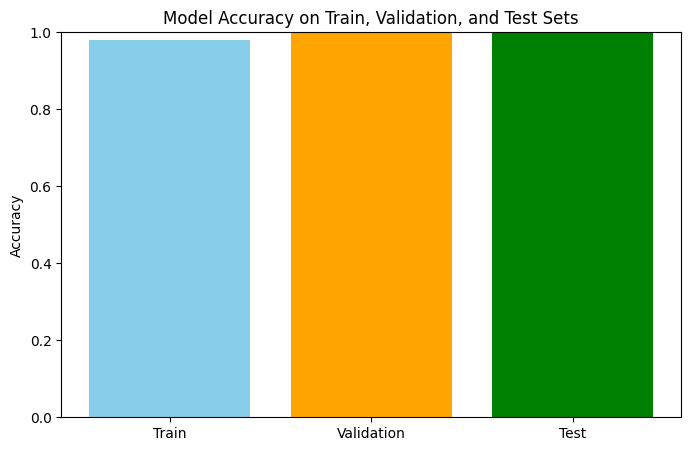

In [ ]:
from sklearn.model_selection import train_test_split
# Evaluasi performa
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print skor
print(f"Train Score - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
print(f"Validation Score - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")
print(f"Test Score - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Visualisasi
scores = {
    "Train": train_accuracy,
    "Validation": val_accuracy,
    "Test": test_accuracy,
}

plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'orange', 'green'])
plt.title("Model Accuracy on Train, Validation, and Test Sets")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Range accuracy tetap dari 0 hingga 1
plt.show()


#**Visualisasi**

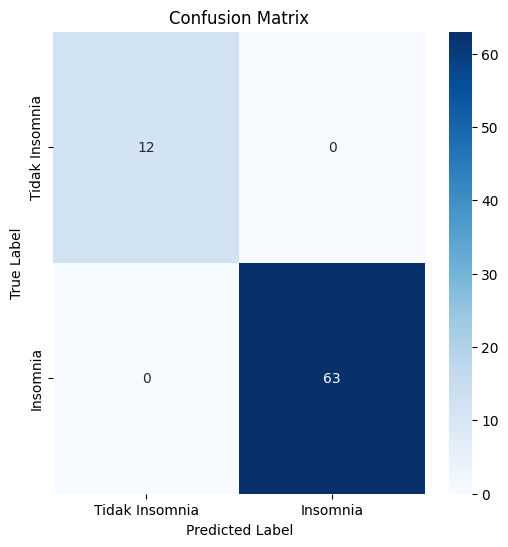

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Insomnia', 'Insomnia'], yticklabels=['Tidak Insomnia', 'Insomnia'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

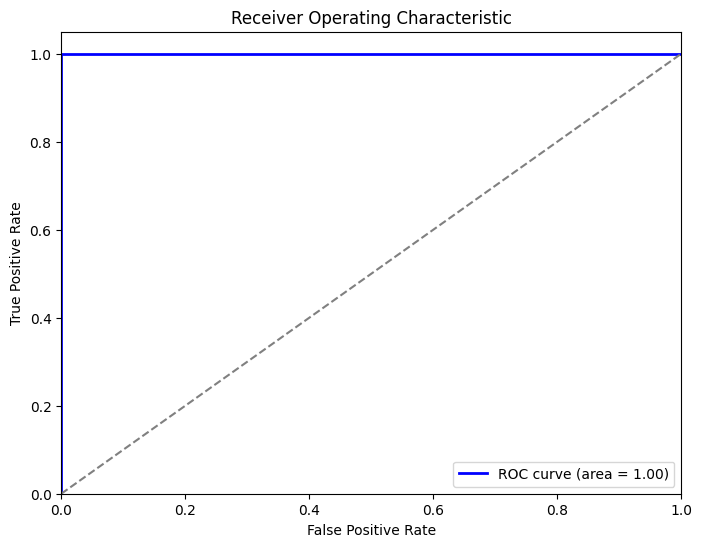

In [ ]:
# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

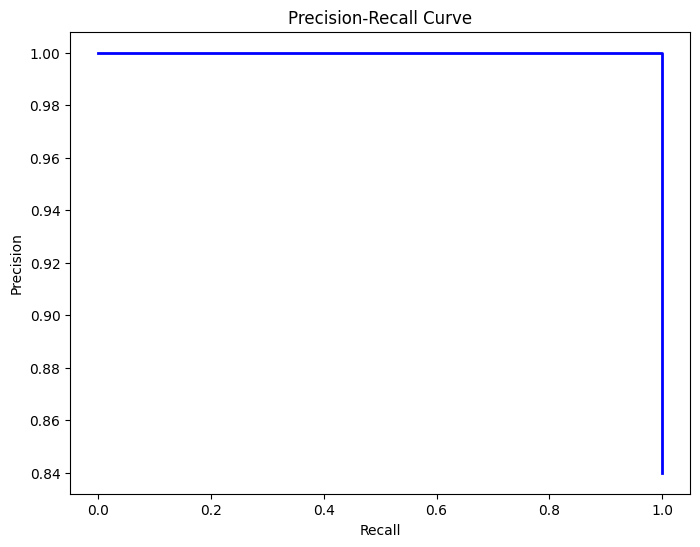

In [ ]:
# Menghitung precision, recall dan threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

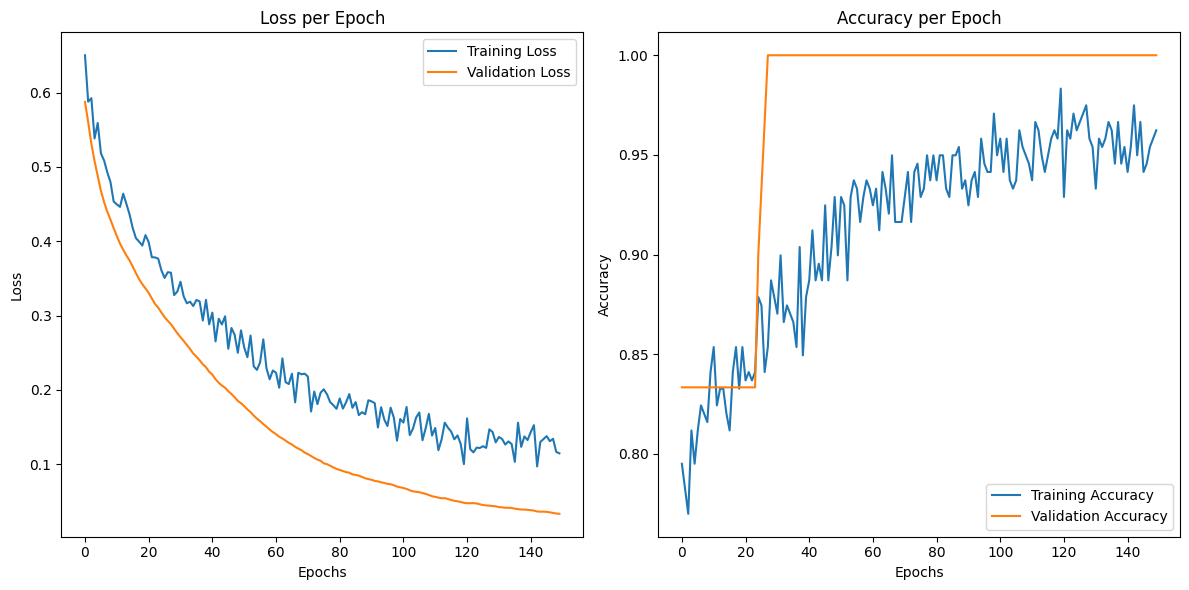

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#**Model Tuning**

Using Hyperparameter Tuning

In [ ]:
# Define a function to create the model with different hyperparameters
def create_model(optimizer='adam', hidden_layers=2, units_per_layer=64):
    model = Sequential()
    model.add(Dense(units_per_layer, input_dim=X_train.shape[1], activation='relu'))

    # Add hidden layers based on input
    for _ in range(hidden_layers - 1):
        model.add(Dense(units_per_layer, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Manually define hyperparameters to tune
optimizers =['sgd']
hidden_layers = [2, 3]
units_per_layer = [64, 128]

In [ ]:
# Train models for each combination of hyperparameters
best_accuracy = 0
best_model = None
best_params = {}

In [ ]:
for optimizer in optimizers:
    for layers in hidden_layers:
        for units in units_per_layer:
            print(f"Training model with optimizer={optimizer}, hidden_layers={layers}, units_per_layer={units}")

            # Create model with the current hyperparameters
            model = create_model(optimizer=optimizer, hidden_layers=layers, units_per_layer=units)

            # Train the model
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

            # Evaluate the model
            y_pred = (model.predict(X_test) > 0.5).astype("int32")
            accuracy = accuracy_score(y_test, y_pred)

            # Update the best model if necessary
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = {'optimizer': optimizer, 'hidden_layers': layers, 'units_per_layer': units}

Training model with optimizer=sgd, hidden_layers=2, units_per_layer=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training model with optimizer=sgd, hidden_layers=2, units_per_layer=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with optimizer=sgd, hidden_layers=3, units_per_layer=64
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training model with optimizer=sgd, hidden_layers=3, units_per_layer=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
print("Best Model Parameters:", best_params)
print("Best Model Accuracy:", best_accuracy)

Best Model Parameters: {'optimizer': 'sgd', 'hidden_layers': 2, 'units_per_layer': 64}
Best Model Accuracy: 1.0


Evaluate the Best Model

In [ ]:
# Evaluate the best model on the test set
y_pred_best = (best_model.predict(X_test) > 0.5).astype("int32")

# Classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(f"Accuracy for Best Model: {accuracy_score(y_test, y_pred_best):.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        63

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy for Best Model: 1.0000


Visualisasi menggunakan Confusion Matrix

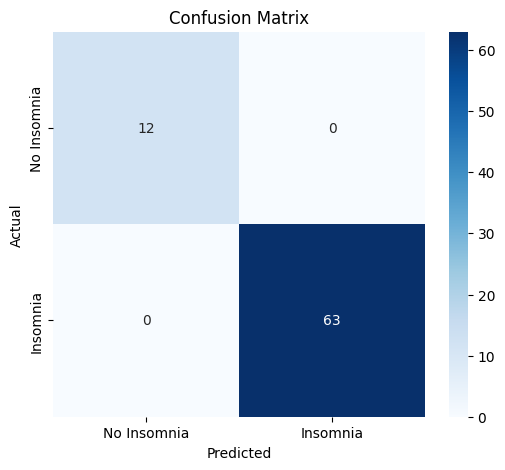

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Insomnia', 'Insomnia'], yticklabels=['No Insomnia', 'Insomnia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np

# Pertanyaan Survei berdasarkan fitur yang relevan
print("Survei Deteksi Insomnia")

# Pertanyaan untuk setiap fitur relevan
gender = input("Pilih jenis kelamin Anda (Laki-laki/Perempuan): ").lower()
stress_level = float(input("Pada skala 1-10, seberapa tinggi tingkat stres Anda? (1 tidak stres, 10 sangat stres): "))
sleep_duration = float(input("Berapa jam tidur Anda setiap malam? "))
quality_of_sleep = float(input("Pada skala 1-10, bagaimana kualitas tidur Anda? (1 sangat buruk, 10 sangat baik): "))


# Mempersiapkan data input untuk model
# Pastikan Anda memiliki cara untuk mengubah 'Gender' menjadi angka (misalnya, Laki-laki=0, Perempuan=1)
gender = 0 if gender == "laki-laki" else 1

# Membuat input yang sesuai dengan urutan fitur yang telah dipilih
X_survey = np.array([[gender, stress_level, sleep_duration, quality_of_sleep]])

# Prediksi dengan model
y_pred = model.predict(X_survey)

# Menampilkan hasil prediksi
print("\nHasil Prediksi Insomnia:")
if y_pred > 0.5:
    print("Anda kemungkinan besar mengalami insomnia.")
else:
    print("Anda tidak menunjukkan gejala insomnia yang signifikan.")


Survei Deteksi Insomnia
Pilih jenis kelamin Anda (Laki-laki/Perempuan): perempuan
Pada skala 1-10, seberapa tinggi tingkat stres Anda? (1 tidak stres, 10 sangat stres): 1
Berapa jam tidur Anda setiap malam? 1
Pada skala 1-10, bagaimana kualitas tidur Anda? (1 sangat buruk, 10 sangat baik): 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Hasil Prediksi Insomnia:
Anda kemungkinan besar mengalami insomnia.


#**Model Deployment**

In [ ]:
# # Menyimpan model menggunakan format HDF5 (.h5)
# model.save('best_insomnia_model.h5')
# Save the model in .Pkeras format (Make sure it saves correctly)
model.save('insomnia_model.h5')


In [ ]:
# import tensorflow as tf

# model = tf.keras.models.load_model('best_insomnia_model.h5')
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()
# open("best_insomnia_model.tflite", "wb").write(tflite_model)

In [ ]:
import tensorflow as tf

# Convert the model to TFLite format
model = tf.keras.models.load_model('insomnia_model.h5')  # Load model in .keras format
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Convert using the updated method
tflite_model = converter.convert()

# Save the TFLite model
with open('insomnia_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpuraahp2h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138244376002080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244376187776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244375793856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244375801072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244375795968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244375794560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244375798432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138244375722144: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# !pip install tflite-support


In [ ]:
# pip install protobuf==3.20.*


In [ ]:
# import os
# os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'


In [ ]:
# !pip install --upgrade tensorflow tflite-support protobuf


In [ ]:
# !pip install --upgrade tf-keras


In [ ]:
from csv import writer
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

MODEL_PATH = "/content/insomnia_model.tflite"
LABELS = ["No Insomnia", "Insomnia"]

INPUT_MEAN = 0.0
INPUT_STD = 1.0

OUTPUT_MODEL_PATH = "insomnia_model_with_metadata.tflite"


writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(MODEL_PATH),
    input_norm_mean=[INPUT_MEAN],
    input_norm_std=[INPUT_STD],
    label_file_paths=["/content/LABELS.txt"])

with open(OUTPUT_MODEL_PATH, "wb") as f:
    f.write(writer.populate())

In [ ]:
import tensorflow as tf

model_path = 'insomnia_model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:", input_details)
print("Output Details:", output_details)

Input Details: [{'name': 'serving_default_input_layer_4:0', 'index': 0, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([-1,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 13, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!pip uninstall -y tflite-support
!pip install protobuf==3.20.*
!git clone https://github.com/tensorflow/tflite-support.git
%cd tflite-support
!python3 setup.py build
!python3 setup.py install --user

Found existing installation: tflite-support 0.4.4
Uninstalling tflite-support-0.4.4:
  Successfully uninstalled tflite-support-0.4.4
Cloning into 'tflite-support'...
remote: Enumerating objects: 25989, done.
remote: Counting objects: 100% (1112/1112), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 25989 (delta 622), reused 1026 (delta 588), pack-reused 24877 (from 1)
Receiving objects: 100% (25989/25989), 146.66 MiB | 23.56 MiB/s, done.
Resolving deltas: 100% (16382/16382), done.
Updating files: 100% (1271/1271), done.
/content/tflite-support/tflite-support
python3: can't open file '/content/tflite-support/tflite-support/setup.py': [Errno 2] No such file or directory
python3: can't open file '/content/tflite-support/tflite-support/setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install tflite-support

  Using cached tflite_support-0.4.4-cp310-cp310-manylinux2014_x86_64.whl.metadata (2.4 kB)
Using cached tflite_support-0.4.4-cp310-cp310-manylinux2014_x86_64.whl (60.8 MB)
